<h1><b><center>Optimasi Model Long-Short Term Memory Menggunakan Mekanisme Attention untuk Prediksi Harga Bitcoin</center></b></h1>
</br>

#1. Penyiapan Data (Scrub)

## 1. Transformation

In [ ]:
# Import Library yang dibutuhkan
import pandas as pd
import io
from google.colab import files

In [ ]:
# Mengupload file data historis ke google colab
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [ ]:
# Melakukan Transformasi
df = pd.read_csv(io.BytesIO(uploaded['BTC-USD.csv']))
# Menampilkan Hasil
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400
1,2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,21777700
2,2014-10-03,375.181000,377.695007,357.859009,359.511993,359.511993,30901200
3,2014-10-04,359.891998,364.487000,325.885986,328.865997,328.865997,47236500
4,2014-10-05,328.915985,341.800995,289.295990,320.510010,320.510010,83308096
...,...,...,...,...,...,...,...
3374,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
3375,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
3376,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055
3377,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945


In [ ]:
# Memastikan Transformasi
print(type(df))

<class 'pandas.core.frame.DataFrame'>


## 2. Data Cleaning

In [ ]:
# Import Library yang dibutuhkan
from tabulate import tabulate

# Memeriksa apakah ada data duplikat
data_duplikat = df.duplicated().sum()

# Buat DataFrame untuk tabel
duplicate_df = pd.DataFrame({
    'Kolom': ['Total Data Duplikat'],
    'Jumlah Nilai Duplikat': [data_duplikat]
})

# Ubah ke dalam format tabel
table_duplikat = tabulate(duplicate_df, headers='keys', tablefmt='grid')

# Tampilkan tabel
print(table_duplikat)

+----+---------------------+-------------------------+
|    | Kolom               |   Jumlah Nilai Duplikat |
+====+=====================+=========================+
|  0 | Total Data Duplikat |                       0 |
+----+---------------------+-------------------------+


In [ ]:
# Memerikas data yang hilang
# Hitung jumlah nilai yang hilang
missing_data = df.isnull().sum()

# Ubah ke dalam format tabel
table_hilang = tabulate(missing_data.to_frame(), headers=['Kolom', 'Jumlah Nilai Hilang'], tablefmt='grid')

# Tampilkan tabel
print(table_hilang)

+-----------+-----------------------+
| Kolom     |   Jumlah Nilai Hilang |
+===========+=======================+
| Date      |                     0 |
+-----------+-----------------------+
| Open      |                     0 |
+-----------+-----------------------+
| High      |                     0 |
+-----------+-----------------------+
| Low       |                     0 |
+-----------+-----------------------+
| Close     |                     0 |
+-----------+-----------------------+
| Adj Close |                     0 |
+-----------+-----------------------+
| Volume    |                     0 |
+-----------+-----------------------+


In [ ]:
# Pemeriksaan Tipe Data
# Dapatkan tipe data setiap kolom
data_types = df.dtypes

# Ubah ke dalam format tabel
table_tipe = tabulate(data_types.to_frame(), headers=['Kolom', 'Tipe Data'], tablefmt='grid')

# Tampilkan tabel
print(table_tipe)

+-----------+-------------+
| Kolom     | Tipe Data   |
+===========+=============+
| Date      | object      |
+-----------+-------------+
| Open      | float64     |
+-----------+-------------+
| High      | float64     |
+-----------+-------------+
| Low       | float64     |
+-----------+-------------+
| Close     | float64     |
+-----------+-------------+
| Adj Close | float64     |
+-----------+-------------+
| Volume    | int64       |
+-----------+-------------+


In [ ]:
# Mengubah tipe data
df2 = df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])

In [ ]:
# Memastikan tipe data sudah benar
# Dapatkan tipe data setiap kolom
data_types2 = df2.dtypes

# Ubah ke dalam format tabel
table_tipe2 = tabulate(data_types2.to_frame(), headers=['Kolom', 'Tipe Data'], tablefmt='grid')

# Tampilkan tabel
print(table_tipe2)

+-----------+----------------+
| Kolom     | Tipe Data      |
+===========+================+
| Date      | datetime64[ns] |
+-----------+----------------+
| Open      | float64        |
+-----------+----------------+
| High      | float64        |
+-----------+----------------+
| Low       | float64        |
+-----------+----------------+
| Close     | float64        |
+-----------+----------------+
| Adj Close | float64        |
+-----------+----------------+
| Volume    | int64          |
+-----------+----------------+


## 3. Normalization

In [ ]:
# Import Library yang dibutuhkan
# Menginisiasi Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Memilih Kolom yang ingin dinormalkan
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

# Normalisasi Kolom yang dipilih
df3 = df2.copy()
df3[num_cols] = scaler.fit_transform(df2[num_cols])

# Hasil Setelah di Normalisasi
df3.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,0.003125,0.002620,0.003161,0.003050,0.003050,0.000058
1,2014-10-02,0.003074,0.002534,0.003042,0.002923,0.002923,0.000045
2,2014-10-03,0.002943,0.002420,0.002814,0.002692,0.002692,0.000071
3,2014-10-04,0.002716,0.002227,0.002332,0.002237,0.002237,0.000118
4,2014-10-05,0.002256,0.001897,0.001779,0.002113,0.002113,0.000221
5,2014-10-06,0.002130,0.001945,0.001979,0.002255,0.002255,0.000208
6,2014-10-07,0.002281,0.001859,0.002250,0.002346,0.002346,0.000123
7,2014-10-08,0.002363,0.002080,0.002351,0.002594,0.002594,0.000139
8,2014-10-09,0.002610,0.002493,0.002661,0.002774,0.002774,0.000221
9,2014-10-10,0.002787,0.002382,0.002741,0.002722,0.002722,0.000108


# 2. Eksplorasi Data (Explore)

## 1. Mutual Information Score

In [ ]:
# Import Library yang diperlukan
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

In [ ]:
# Memilih fitur atau kolom yang ingin dihitung skornya terhadap harga close
features = ['Open', 'High', 'Low', 'Volume']

# Hitung skor untuk setiap fitur
scores = mutual_info_regression(df3[features], df3['Close'])

# Series untuk memudahkan visualisasi
mi_scores = pd.Series(scores, name='MI Scores', index=features)

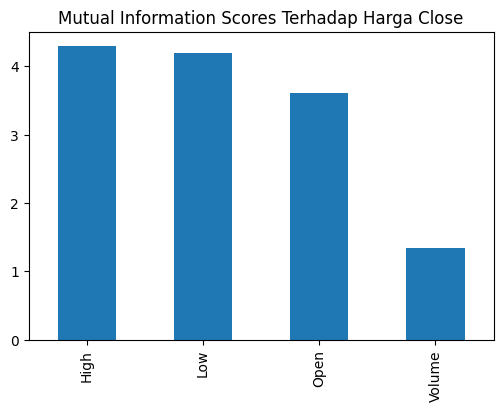

In [ ]:
# Visualisasi Hasil Perhitungan
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores.plot.bar(figsize=(6, 4))
plt.title('Mutual Information Scores Terhadap Harga Close')
plt.show()

## 2. Data Reduction

In [ ]:
# Membandingkan kedua kolom dan menghitung jumlah perbedaan
jumlah_perbedaan = (df3['Close'] != df3['Adj Close']).sum()
# Buat DataFrame untuk tabel
duplicate_df = pd.DataFrame({
    'Kolom': ['Total Data Berbeda'],
    'Jumlah Nilai Berbeda': [jumlah_perbedaan]
})
# Ubah ke dalam format tabel
table_perbedaan = tabulate(duplicate_df, headers='keys', tablefmt='grid')
# Tampilkan tabel
print(table_perbedaan)

+----+--------------------+------------------------+
|    | Kolom              |   Jumlah Nilai Berbeda |
+====+====================+========================+
|  0 | Total Data Berbeda |                      0 |
+----+--------------------+------------------------+


In [ ]:
# Menghapus fitur
df4 = df3.drop(['Volume','Adj Close'], axis=1)
# Menampilkan hasil setelah fitur dihapus
df4.head()

,Date,Open,High,Low,Close
0,2014-10-01,0.003125,0.002620,0.003161,0.003050
1,2014-10-02,0.003074,0.002534,0.003042,0.002923
2,2014-10-03,0.002943,0.002420,0.002814,0.002692
3,2014-10-04,0.002716,0.002227,0.002332,0.002237
4,2014-10-05,0.002256,0.001897,0.001779,0.002113


## 3. Splitting Data

In [ ]:
# Memisahkan fitur (Open, High, Low) dan target (Close)
features = df4[['Open', 'High', 'Low']]
target = df4['Close']

# Split data tanpa diacak
split_ratio = 0.8 # 80% untuk data training
split_index = int(len(df4) * split_ratio)

features_train = features[:split_index]
features_test = features[split_index:]
target_train = target[:split_index]
target_test = target[split_index:]

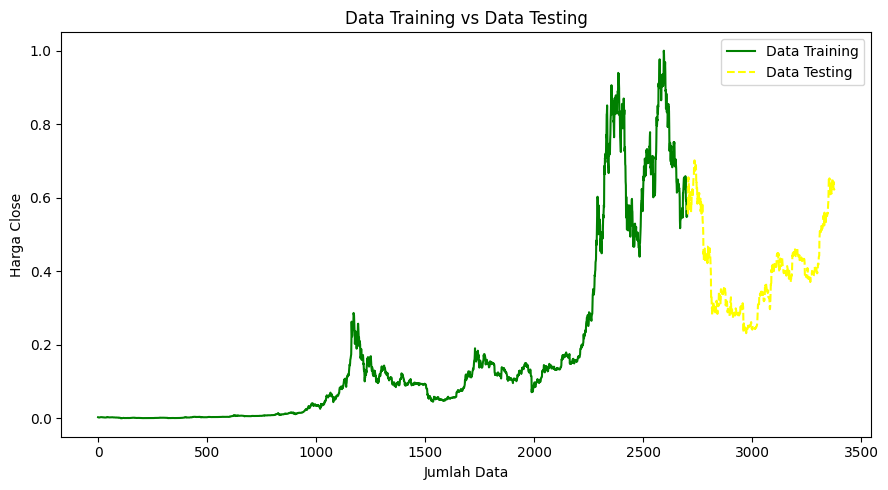

In [ ]:
# Membuat grafik data training dan testing
plt.figure(figsize=(9, 5))

plt.plot(target_train.index, target_train, label='Data Training', color='green')
plt.plot(target_test.index, target_test, label='Data Testing', color='yellow', linestyle='dashed')
plt.title('Data Training vs Data Testing')
plt.xlabel('Jumlah Data')
plt.ylabel('Harga Close')
plt.legend()

# Menyimpan grafik sebagai file PNG
# plt.savefig('data_training_vs_data_testing.png')

plt.tight_layout()
plt.show()

In [ ]:
# Menghitung jumlah Data Training dan testing
total = len(target_train)+len(target_test)
print("Total Data = ", total)
print("80% Data Training = ",len(target_train))
print("20% Data Testing = ",len(target_test))

Total Data =  3379
80% Data Training =  2703
20% Data Testing =  676


In [ ]:
# Mengetahui Tanggal
print("Date Awal Training",df4.iloc[0].Date.date())
print("Date Terakhir Training",df4.iloc[2702].Date.date())
print("Date Awal Testing",df4.iloc[2703].Date.date())
print("Date Terakhir Testing",df4.iloc[-1].Date.date())

Date Awal Training 2014-10-01
Date Terakhir Training 2022-02-23
Date Awal Testing 2022-02-24
Date Terakhir Testing 2023-12-31


## 4. Resahpe

In [ ]:
# Import Library yang dibutuhkan
import numpy as np

# Fungsi untuk membuat dataset dengan timesteps
def create_dataset(features, target, timesteps=1):
    X, y = [], []
    for i in range(len(features) - timesteps):
        X.append(features[i:(i + timesteps)])
        y.append(target[i + timesteps])
    return np.array(X), np.array(y)

timesteps = 30
X_train, y_train = create_dataset(features_train.values, target_train.values, timesteps)
X_test, y_test = create_dataset(features_test.values, target_test.values, timesteps)

In [ ]:
# Sample 1 X_train dengan 30 timesteps
X_train[0]

array([[0.00312485, 0.00261962, 0.00316067],
       [0.00307381, 0.00253385, 0.00304236],
       [0.00294309, 0.00242008, 0.00281449],
       [0.00271615, 0.00222748, 0.00233159],
       [0.00225638, 0.00189668, 0.00177896],
       [0.00212982, 0.00194528, 0.00197929],
       [0.00228114, 0.00185943, 0.00224997],
       [0.00236325, 0.00207987, 0.00235126],
       [0.00261012, 0.00249344, 0.00266086],
       [0.00278733, 0.00238176, 0.00274055],
       [0.00273797, 0.00226691, 0.00278567],
       [0.00275644, 0.00244542, 0.00278859],
       [0.00298375, 0.00270488, 0.0029812 ],
       [0.00318815, 0.00291591, 0.00331992],
       [0.00332564, 0.0027778 , 0.00328129],
       [0.0032301 , 0.00272793, 0.00304423],
       [0.00305552, 0.00253357, 0.00307925],
       [0.00307363, 0.00267472, 0.00313335],
       [0.00318165, 0.00265695, 0.00324642],
       [0.00315163, 0.00260074, 0.00312249],
       [0.00305055, 0.00263809, 0.00316149],
       [0.00310542, 0.00257875, 0.00318286],
       [0.

In [ ]:
# Contoh 1 y_train
y_train[0]

0.0023775196324856635

In [ ]:
X_train.shape

(2673, 30, 3)

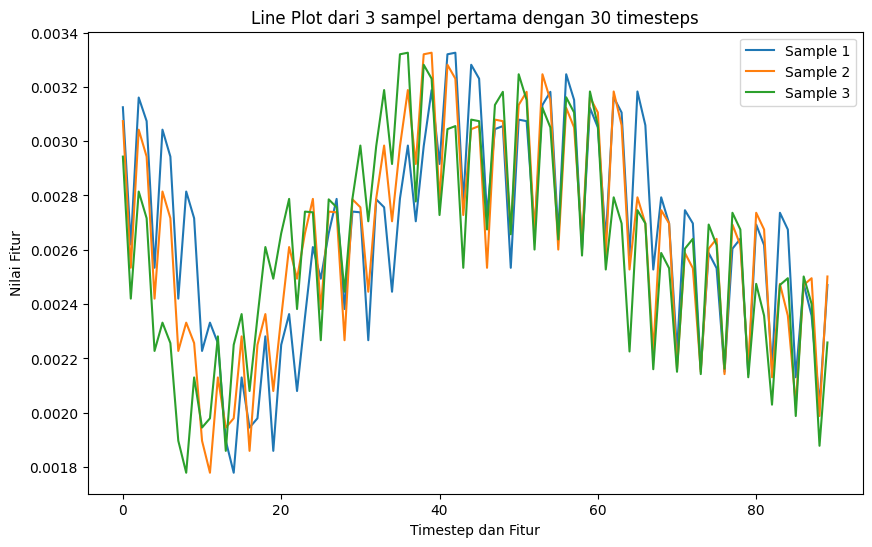

In [ ]:
# Menampilkan hasil reshape dalam bentuk lineplot
samples_to_display = 3

plt.figure(figsize=(10, 6))
for i in range(samples_to_display):
    plt.plot(X_train[i].flatten(), label=f'Sample {i+1}')
plt.title(f'Line Plot dari {samples_to_display} sampel pertama dengan {timesteps} timesteps')
plt.xlabel('Timestep dan Fitur')
plt.ylabel('Nilai Fitur')
plt.legend()

# Menyimpan grafik sebagai file PNG
# plt.savefig('Sample_hasil_rehape.png')

plt.show()

# 3. Pembangunan Model

## 1. Model LSTM
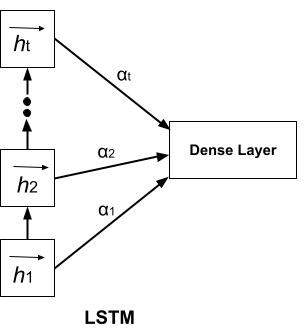

In [ ]:
!pip install optuna==3.6.1 --quiet

In [ ]:
# Import Library yang diperlukan
import optuna
import optuna.visualization as vis
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam, RMSprop, SGD, Adagrad

In [ ]:
def create_model(trial, num_layers):
    model = Sequential()
    units = trial.suggest_int('units', 50, 150) # akan memakai parameter unit dari 50 sampai 150
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
    optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd', 'adagrad'])

    # Tambahkan hidden layer LSTM sesuai dengan input parameter num_layers
    for i in range(num_layers):
        if i == 0:
            # Layer pertama perlu input_shape
            model.add(LSTM(units=units, return_sequences=(i < num_layers - 1), input_shape=(timesteps, X_train.shape[2])))
        else:
            # Layer berikutnya tidak memerlukan input_shape
            model.add(LSTM(units=units, return_sequences=(i < num_layers - 1)))
        model.add(Dropout(dropout_rate))

    # Tambahkan lapisan Dense sebagai output layer
    model.add(Dense(1))  # Output adalah satu nilai yaitu Close

    # Tentukan optimizer berdasarkan pilihan
    if optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'rmsprop':
        opt = RMSprop()
    elif optimizer == 'sgd':
        opt = SGD()
    elif optimizer == 'adagrad':
        opt = Adagrad()

    # Compile model dengan loss function dan optimizer yang dipilih
    model.compile(optimizer=opt, loss='mean_squared_error')

    return model

In [ ]:
# Fungsi tujuan untuk Optuna
def objective(trial):
    model = create_model(trial,1)
    epochs = trial.suggest_int('epochs', 10, 50)
    batch_size = trial.suggest_int('batch_size', 16, 64)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test))
    loss = history.history['val_loss'][-1]
    return loss

# Optuna study untuk hyperparameter tuning
# 1 Hidden Layer LSTM
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Menampilkan hasil terbaik
print(f"Best trial: {study.best_trial.value}")
print("Best hyperparameters: ", study.best_trial.params)

[I 2024-07-24 03:57:07,007] A new study created in memory with name: no-name-c701dce2-7b1a-42dc-abbd-b2f81f7b07d0
[I 2024-07-24 03:57:46,683] Trial 0 finished with value: 0.0005529439076781273 and parameters: {'units': 102, 'dropout_rate': 0.44560795948098764, 'optimizer': 'sgd', 'epochs': 17, 'batch_size': 27}. Best is trial 0 with value: 0.0005529439076781273.
[I 2024-07-24 04:01:11,231] Trial 1 finished with value: 0.0006805378943681717 and parameters: {'units': 138, 'dropout_rate': 0.2867281553165433, 'optimizer': 'adagrad', 'epochs': 39, 'batch_size': 22}. Best is trial 0 with value: 0.0005529439076781273.
[I 2024-07-24 04:02:36,419] Trial 2 finished with value: 0.0002396407799096778 and parameters: {'units': 84, 'dropout_rate': 0.4303302625401492, 'optimizer': 'rmsprop', 'epochs': 36, 'batch_size': 27}. Best is trial 2 with value: 0.0002396407799096778.
[I 2024-07-24 04:04:03,356] Trial 3 finished with value: 0.000600083265453577 and parameters: {'units': 118, 'dropout_rate': 0.2

Best trial: 0.00020534828945528716
Best hyperparameters:  {'units': 103, 'dropout_rate': 0.31735347072584685, 'optimizer': 'rmsprop', 'epochs': 44, 'batch_size': 24}


In [ ]:
# Fungsi tujuan untuk Optuna
def objective(trial):
    model = create_model(trial,2)
    epochs = trial.suggest_int('epochs', 10, 50)
    batch_size = trial.suggest_int('batch_size', 16, 64)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test))
    loss = history.history['val_loss'][-1]
    return loss

# Optuna study untuk hyperparameter tuning
# 2 Hidden Layer LSTM
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Menampilkan hasil terbaik
print(f"Best trial: {study.best_trial.value}")
print("Best hyperparameters: ", study.best_trial.params)

[I 2024-07-19 02:09:24,080] A new study created in memory with name: no-name-bfc63087-26a8-49f3-9bfc-ab689e3ee474
[I 2024-07-19 02:14:49,990] Trial 0 finished with value: 0.001049712998792529 and parameters: {'units': 82, 'dropout_rate': 0.3401195970749321, 'optimizer': 'adagrad', 'epochs': 50, 'batch_size': 17}. Best is trial 0 with value: 0.001049712998792529.
[I 2024-07-19 02:17:00,472] Trial 1 finished with value: 0.0003842497244477272 and parameters: {'units': 75, 'dropout_rate': 0.4414392221299892, 'optimizer': 'adam', 'epochs': 48, 'batch_size': 64}. Best is trial 1 with value: 0.0003842497244477272.
[I 2024-07-19 02:18:26,042] Trial 2 finished with value: 0.0016431736294180155 and parameters: {'units': 79, 'dropout_rate': 0.3099267225568172, 'optimizer': 'adagrad', 'epochs': 27, 'batch_size': 56}. Best is trial 1 with value: 0.0003842497244477272.
[I 2024-07-19 02:20:51,707] Trial 3 finished with value: 0.00034453548141755164 and parameters: {'units': 59, 'dropout_rate': 0.4919

Best trial: 0.00020172241784166545
Best hyperparameters:  {'units': 96, 'dropout_rate': 0.28105785814692785, 'optimizer': 'adam', 'epochs': 43, 'batch_size': 19}


In [ ]:
# Fungsi tujuan untuk Optuna
def objective(trial):
    model = create_model(trial,3)
    epochs = trial.suggest_int('epochs', 10, 50)
    batch_size = trial.suggest_int('batch_size', 16, 64)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test))
    loss = history.history['val_loss'][-1]
    return loss

# Optuna study untuk hyperparameter tuning
# 3 Hidden Layer LSTM
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Menampilkan hasil terbaik
print(f"Best trial: {study.best_trial.value}")
print("Best hyperparameters: ", study.best_trial.params)

[I 2024-07-26 02:34:47,803] A new study created in memory with name: no-name-5b9704d0-f62f-4355-8acb-c85ed0f37796
[I 2024-07-26 02:37:16,729] Trial 0 finished with value: 0.0005563364829868078 and parameters: {'units': 69, 'dropout_rate': 0.42593042792090374, 'optimizer': 'adam', 'epochs': 28, 'batch_size': 28}. Best is trial 0 with value: 0.0005563364829868078.
[I 2024-07-26 02:44:20,178] Trial 1 finished with value: 0.001598205417394638 and parameters: {'units': 127, 'dropout_rate': 0.4757649815997258, 'optimizer': 'sgd', 'epochs': 47, 'batch_size': 52}. Best is trial 0 with value: 0.0005563364829868078.
[I 2024-07-26 02:50:48,097] Trial 2 finished with value: 0.0004820160393137485 and parameters: {'units': 137, 'dropout_rate': 0.3585080388930828, 'optimizer': 'rmsprop', 'epochs': 43, 'batch_size': 64}. Best is trial 2 with value: 0.0004820160393137485.
[I 2024-07-26 02:58:21,061] Trial 3 finished with value: 0.0015223639784380794 and parameters: {'units': 132, 'dropout_rate': 0.4841

Best trial: 0.00020619753922801465
Best hyperparameters:  {'units': 113, 'dropout_rate': 0.37825303562955953, 'optimizer': 'adam', 'epochs': 48, 'batch_size': 16}


**Training Model LSTM**

In [ ]:
# Import Library yang dibutuhkan
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam, RMSprop, SGD, Adagrad

In [ ]:
# Parameter Optimal Hasil Optuna
dropout_rate1 = 0.28105785814692785
par_units1 = 96
batch1 = 19
opt1= 'adam'

In [ ]:
# Pembuatan Model dengan berdasarkan hasil dari Optuna
# Model LSTM 100 Epochs
model1 = Sequential()
model1.add(LSTM(units=par_units1, return_sequences=True, input_shape=(timesteps, X_train.shape[2])))
model1.add(Dropout(dropout_rate1))
model1.add(LSTM(units=par_units1, return_sequences=False))
model1.add(Dropout(dropout_rate1))
model1.add(Dense(1))

# Menggabungkan Model
model1.compile(optimizer=opt1, loss='mean_squared_error')
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=batch1, validation_data=(X_test, y_test))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0069 - val_loss: 0.0011
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 0.0020 - val_loss: 6.1141e-04
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0013 - val_loss: 4.8207e-04
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0015 - val_loss: 4.3268e-04
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0011 - val_loss: 6.9488e-04
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0011 - val_loss: 5.0521e-04
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 7.7121e-04 - val_loss: 6.2856e-04
Epoch 10/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0011 - val_loss: 8.4010e-04
Epoch 11/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 8.4185e-04 - val_loss: 5.2577e-04

In [ ]:
# Pembuatan Model dengan berdasarkan hasil dari Optuna
# Model LSTM 200 Epochs
model2 = Sequential()
model2.add(LSTM(units=par_units1, return_sequences=True, input_shape=(timesteps, X_train.shape[2])))
model2.add(Dropout(dropout_rate1))
model2.add(LSTM(units=par_units1, return_sequences=False))
model2.add(Dropout(dropout_rate1))
model2.add(Dense(1))

# Menggabungkan Model
model2.compile(optimizer=opt1, loss='mean_squared_error')
history2 = model2.fit(X_train, y_train, epochs=200, batch_size=batch1, validation_data=(X_test, y_test))

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - loss: 0.0050 - val_loss: 0.0024
Epoch 2/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 3/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0013 - val_loss: 5.9425e-04
Epoch 4/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0013 - val_loss: 6.2747e-04
Epoch 5/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 6/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0011 - val_loss: 5.7330e-04
Epoch 7/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0014 - val_loss: 4.0561e-04
Epoch 8/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0011 - val_loss: 4.5987e-04
Epoch 9/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0011 - val_loss: 6.1928e-04
Epoch 10/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0010 - val_loss: 4.2673e-04
Epoch 11/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - loss: 9.7357e-04 - val_loss: 4.2997e-04
Epoc

In [ ]:
# Pembuatan Model dengan berdasarkan hasil dari Optuna
# Model LSTM 300 Epochs
model3 = Sequential()
model3.add(LSTM(units=par_units1, return_sequences=True, input_shape=(timesteps, X_train.shape[2])))
model3.add(Dropout(dropout_rate1))
model3.add(LSTM(units=par_units1, return_sequences=False))
model3.add(Dropout(dropout_rate1))
model3.add(Dense(1))

# Menggabungkan Model
model3.compile(optimizer=opt1, loss='mean_squared_error')
history3 = model3.fit(X_train, y_train, epochs=300, batch_size=batch1, validation_data=(X_test, y_test))

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0124 - val_loss: 9.8917e-04
Epoch 2/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0015 - val_loss: 6.2262e-04
Epoch 3/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0016 - val_loss: 6.7845e-04
Epoch 4/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0013 - val_loss: 6.2083e-04
Epoch 5/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0013 - val_loss: 5.7916e-04
Epoch 6/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0012 - val_loss: 7.3801e-04
Epoch 7/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0011 - val_loss: 5.3400e-04
Epoch 9/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 10/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 11/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 8.1020e-04 - val_loss: 4.0643e-04
Epoc

In [ ]:
# Pembuatan Model dengan berdasarkan hasil dari Optuna
# Model LSTM 400 Epochs
model4 = Sequential()
model4.add(LSTM(units=par_units1, return_sequences=True, input_shape=(timesteps, X_train.shape[2])))
model4.add(Dropout(dropout_rate1))
model4.add(LSTM(units=par_units1, return_sequences=False))
model4.add(Dropout(dropout_rate1))
model4.add(Dense(1))

# Menggabungkan Model
model4.compile(optimizer=opt1, loss='mean_squared_error')
history4 = model4.fit(X_train, y_train, epochs=400, batch_size=batch1, validation_data=(X_test, y_test))

Epoch 1/400
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0073 - val_loss: 7.0079e-04
Epoch 2/400
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/400
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0012 - val_loss: 5.2711e-04
Epoch 4/400
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0015 - val_loss: 8.7042e-04
Epoch 5/400
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0015 - val_loss: 7.1215e-04
Epoch 6/400
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0013 - val_loss: 8.0186e-04
Epoch 7/400
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 8.9572e-04 - val_loss: 4.1766e-04
Epoch 8/400
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0014 - val_loss: 4.8596e-04
Epoch 9/400
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0012 - val_loss: 9.0393e-04
Epoch 10/400
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0011 - val_loss: 3.7244e-04
Epoch 11/400
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 7.3212e-04 - v

In [ ]:
# Pembuatan Model dengan berdasarkan hasil dari Optuna
# Model LSTM 500 Epochs
model5 = Sequential()
model5.add(LSTM(units=par_units1, return_sequences=True, input_shape=(timesteps, X_train.shape[2])))
model5.add(Dropout(dropout_rate1))
model5.add(LSTM(units=par_units1, return_sequences=False))
model5.add(Dropout(dropout_rate1))
model5.add(Dense(1))

# Menggabungkan Model
model5.compile(optimizer=opt1, loss='mean_squared_error')
history5 = model5.fit(X_train, y_train, epochs=500, batch_size=batch1, validation_data=(X_test, y_test))

Epoch 1/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0078 - val_loss: 7.0729e-04
Epoch 2/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0018 - val_loss: 9.3309e-04
Epoch 3/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 4/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0014 - val_loss: 5.4302e-04
Epoch 5/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0014 - val_loss: 9.8624e-04
Epoch 6/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 9.4598e-04 - val_loss: 0.0012
Epoch 7/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0012 - val_loss: 4.0019e-04
Epoch 8/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0012 - val_loss: 5.1921e-04
Epoch 9/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 8.4996e-04 - val_loss: 0.0019
Epoch 10/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 9.7206e-04 - val_loss: 3.5234e-04
Epoch 11/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0011 - val_lo

In [ ]:
import numpy as np

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

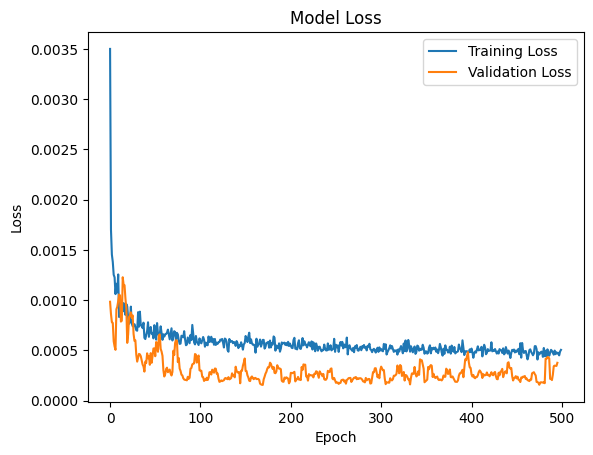

In [ ]:
# Plot training & validation loss values with moving average
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(moving_average(history5.history['val_loss'], window_size=5), label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

## 2. Model LSTM + Attention
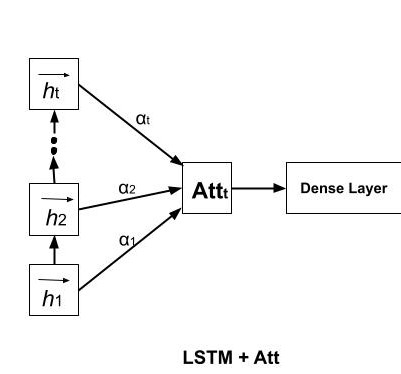

In [ ]:
!pip install optuna==3.6.1 --quiet

In [ ]:
# Import Library yang diperlukan
import optuna
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Dropout, Activation, Multiply, Lambda
from keras.optimizers import Adam, RMSprop, SGD, Adagrad
from keras.callbacks import ModelCheckpoint
import joblib
import os

In [ ]:
def create_model(trial, num_layers):
    input_layer = Input(shape=(timesteps, X_train.shape[2]))

    # LSTM parameters
    lstm_units = trial.suggest_int('lstm_units', 50, 150)
    lstm_out = input_layer

    # Tambahkan hidden layer LSTM sesuai dengan input parameter num_layers
    for i in range(num_layers):
        if i == 0:
            # Layer pertama perlu input_shape dan return_state jika diperlukan
            lstm_out, state_h, state_c = LSTM(lstm_units, return_sequences=True, return_state=True)(lstm_out)
        else:
            # Layer berikutnya tidak memerlukan input_shape dan return_state
            lstm_out = LSTM(lstm_units, return_sequences=True)(lstm_out)
        lstm_out = Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5))(lstm_out)

    # Alignment scores
    alignment_scores = Dense(1, activation='tanh')(lstm_out)

    # Attention weights
    attention_weights = Activation('softmax')(alignment_scores)

    # Context vector
    context_vector = Multiply()([lstm_out, attention_weights])
    context_vector = Lambda(lambda x: tf.reduce_sum(x, axis=1))(context_vector)

    # Dense layer
    output_layer = Dense(1)(context_vector)

    # Create and compile the model
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'adagrad'])
    if optimizer_name == 'adam':
        optimizer = Adam()
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop()
    elif optimizer_name == 'adagrad':
        optimizer = Adagrad()

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [ ]:
# Fungsi tujuan untuk Optuna
def objective(trial):
    model = create_model(trial, 1)
    epochs = trial.suggest_int('epochs', 10, 50)
    batch_size = trial.suggest_int('batch_size', 16, 64)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test))
    loss = history.history['val_loss'][-1]
    return loss

  # Optuna study untuk hyperparameter 1 HL
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Menampilkan hasil terbaik
print(f"Best trial: {study.best_trial.value}")
print("Best hyperparameters: ", study.best_trial.params)


[I 2024-07-24 05:52:58,319] A new study created in memory with name: no-name-ec4b9e06-62c7-4f17-b461-947285f83459
[I 2024-07-24 05:53:42,393] Trial 0 finished with value: 0.03365035355091095 and parameters: {'lstm_units': 137, 'dropout_rate': 0.4800286408507814, 'optimizer': 'adam', 'epochs': 10, 'batch_size': 50}. Best is trial 0 with value: 0.03365035355091095.
[I 2024-07-24 05:55:06,608] Trial 1 finished with value: 0.004233133979141712 and parameters: {'lstm_units': 133, 'dropout_rate': 0.4443305103751535, 'optimizer': 'adagrad', 'epochs': 21, 'batch_size': 36}. Best is trial 1 with value: 0.004233133979141712.
[I 2024-07-24 05:56:33,573] Trial 2 finished with value: 0.002488774713128805 and parameters: {'lstm_units': 89, 'dropout_rate': 0.26164291431578346, 'optimizer': 'rmsprop', 'epochs': 42, 'batch_size': 37}. Best is trial 2 with value: 0.002488774713128805.
[I 2024-07-24 05:57:08,838] Trial 3 finished with value: 0.0028336739633232355 and parameters: {'lstm_units': 103, 'drop

Best trial: 0.0007497689221054316
Best hyperparameters:  {'lstm_units': 125, 'dropout_rate': 0.22993087336400508, 'optimizer': 'adam', 'epochs': 44, 'batch_size': 57}


In [ ]:
# Fungsi tujuan untuk Optuna
def objective(trial):
    model = create_model(trial, 2)
    epochs = trial.suggest_int('epochs', 10, 50)
    batch_size = trial.suggest_int('batch_size', 16, 64)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test))
    loss = history.history['val_loss'][-1]
    return loss

  # Optuna study untuk hyperparameter 2 HL
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Menampilkan hasil terbaik
print(f"Best trial: {study.best_trial.value}")
print("Best hyperparameters: ", study.best_trial.params)


[I 2024-07-20 01:39:05,356] A new study created in memory with name: no-name-d3eb4478-b9c3-46fb-9b0c-76d22e965d94
[I 2024-07-20 01:39:51,487] Trial 0 finished with value: 0.0029285738710314035 and parameters: {'lstm_units': 64, 'dropout_rate': 0.3430300909568391, 'optimizer': 'adam', 'epochs': 15, 'batch_size': 40}. Best is trial 0 with value: 0.0029285738710314035.
[I 2024-07-20 01:43:17,528] Trial 1 finished with value: 0.0017221771413460374 and parameters: {'lstm_units': 74, 'dropout_rate': 0.3351574768722655, 'optimizer': 'rmsprop', 'epochs': 41, 'batch_size': 25}. Best is trial 1 with value: 0.0017221771413460374.
[I 2024-07-20 01:46:43,626] Trial 2 finished with value: 0.0018562397453933954 and parameters: {'lstm_units': 91, 'dropout_rate': 0.3839941713291386, 'optimizer': 'adam', 'epochs': 46, 'batch_size': 63}. Best is trial 1 with value: 0.0017221771413460374.
[I 2024-07-20 01:49:09,541] Trial 3 finished with value: 0.002441766206175089 and parameters: {'lstm_units': 87, 'drop

Best trial: 0.0008448190637864172
Best hyperparameters:  {'lstm_units': 140, 'dropout_rate': 0.2303992994147033, 'optimizer': 'adam', 'epochs': 47, 'batch_size': 28}


In [ ]:
# Fungsi tujuan untuk Optuna
def objective(trial):
    model = create_model(trial, 3)
    epochs = trial.suggest_int('epochs', 10, 50)
    batch_size = trial.suggest_int('batch_size', 16, 64)

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        verbose=0,
        validation_data=(X_test, y_test))

    loss = history.history['val_loss'][-1]
    return loss

# Optuna study untuk hyperparameter 3 HL
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Menampilkan hasil terbaik
print(f"Best trial: {study.best_trial.value}")
print("Best hyperparameters: ", study.best_trial.params)

[I 2024-07-27 06:48:34,915] A new study created in memory with name: no-name-c48070c2-236d-41f5-8396-1d22ed9635f5
[I 2024-07-27 06:50:31,792] Trial 0 finished with value: 0.004712491761893034 and parameters: {'lstm_units': 92, 'dropout_rate': 0.29514657203516265, 'optimizer': 'adagrad', 'epochs': 13, 'batch_size': 19}. Best is trial 0 with value: 0.004712491761893034.
[I 2024-07-27 06:51:45,174] Trial 1 finished with value: 0.0036557207349687815 and parameters: {'lstm_units': 84, 'dropout_rate': 0.47923271024388553, 'optimizer': 'adam', 'epochs': 11, 'batch_size': 60}. Best is trial 1 with value: 0.0036557207349687815.
[I 2024-07-27 07:02:14,706] Trial 2 finished with value: 0.0023844048846513033 and parameters: {'lstm_units': 141, 'dropout_rate': 0.4127553962687559, 'optimizer': 'adagrad', 'epochs': 48, 'batch_size': 38}. Best is trial 2 with value: 0.0023844048846513033.
[I 2024-07-27 07:04:42,713] Trial 3 finished with value: 0.002324769040569663 and parameters: {'lstm_units': 59, '

Best trial: 0.0009201639331877232
Best hyperparameters:  {'lstm_units': 149, 'dropout_rate': 0.3327123896645832, 'optimizer': 'adam', 'epochs': 48, 'batch_size': 43}


**Training Model LSTM+Att**

In [ ]:
# Membuat model LSTM + ATTENTION
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, Activation, Multiply, Lambda, Reshape
from tensorflow.keras.models import Model

In [ ]:
# Mendefinisikan Parameter optimal berdasarkan hasil Optuna
par_units2 = 125
par_dropout2 = 0.22993087336400508
opt2 = 'adam'
par_batch2 = 57

In [ ]:
# Model LSTM + Attention
# Model 100 Epochs
# Input layer
input_layer = Input(shape=(timesteps, X_train.shape[2]))

# LSTM layer
lstm_out, state_h, state_c = LSTM(par_units2, return_sequences=True, return_state=True)(input_layer)
lstm_out = Dropout(par_dropout2)(lstm_out)

# Attention Layer
# Alignment scores
alignment_scores = Dense(1, activation='tanh')(lstm_out)  # Shape: (batch_size, time_steps, 1)
alignment_scores = Reshape((timesteps,))(alignment_scores)  # Reshape to (batch_size, time_steps)

# Attention weights
attention_weights = Activation('softmax')(alignment_scores)  # Shape: (batch_size, time_steps)

# Context vector
context_vector = Multiply()([lstm_out, attention_weights[..., None]])  # Element-wise multiplication
context_vector = Lambda(lambda x: tf.reduce_sum(x, axis=1), output_shape=(par_units2,))(context_vector)  # Shape: (batch_size, lstm_units)

# Dense layer for output
output_layer = Dense(1)(context_vector)

# Create and compile the model
model6 = Model(inputs=input_layer, outputs=output_layer)
model6.compile(optimizer=opt2, loss='mean_squared_error')

# Training Model
history6 = model6.fit(X_train, y_train, epochs=100, batch_size=par_batch2, validation_data=(X_test, y_test))

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0299 - val_loss: 0.0026
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0017 - val_loss: 0.0029
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0019 - val_loss: 0.0035
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 9.6937e-04 - val_loss: 0.0019
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/

In [ ]:
# Model LSTM + Attention
# Model 200 Epochs
# Input layer
input_layer = Input(shape=(timesteps, X_train.shape[2]))

# LSTM layer
lstm_out, state_h, state_c = LSTM(par_units2, return_sequences=True, return_state=True)(input_layer)
lstm_out = Dropout(par_dropout2)(lstm_out)

# Attention Layer
# Alignment scores
alignment_scores = Dense(1, activation='tanh')(lstm_out)  # Shape: (batch_size, time_steps, 1)
alignment_scores = Reshape((timesteps,))(alignment_scores)  # Reshape to (batch_size, time_steps)

# Attention weights
attention_weights = Activation('softmax')(alignment_scores)  # Shape: (batch_size, time_steps)

# Context vector
context_vector = Multiply()([lstm_out, attention_weights[..., None]])  # Element-wise multiplication
context_vector = Lambda(lambda x: tf.reduce_sum(x, axis=1), output_shape=(par_units2,))(context_vector)  # Shape: (batch_size, lstm_units)

# Dense layer for output
output_layer = Dense(1)(context_vector)

# Create and compile the model
model7 = Model(inputs=input_layer, outputs=output_layer)
model7.compile(optimizer=opt2, loss='mean_squared_error')

# Training Model
history7 = model7.fit(X_train, y_train, epochs=200, batch_size=par_batch2, validation_data=(X_test, y_test))

Epoch 1/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0148 - val_loss: 0.0021
Epoch 2/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 3/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 4/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 5/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 6/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 7/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 8/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 9/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0016 - val_loss: 0.0035
Epoch 10/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 11/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 12/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/ste

In [ ]:
# Model LSTM + Attention
# Model 300 Epochs
# Input layer
input_layer = Input(shape=(timesteps, X_train.shape[2]))

# LSTM layer
lstm_out, state_h, state_c = LSTM(par_units2, return_sequences=True, return_state=True)(input_layer)
lstm_out = Dropout(par_dropout2)(lstm_out)

# Attention Layer
# Alignment scores
alignment_scores = Dense(1, activation='tanh')(lstm_out)  # Shape: (batch_size, time_steps, 1)
alignment_scores = Reshape((timesteps,))(alignment_scores)  # Reshape to (batch_size, time_steps)

# Attention weights
attention_weights = Activation('softmax')(alignment_scores)  # Shape: (batch_size, time_steps)

# Context vector
context_vector = Multiply()([lstm_out, attention_weights[..., None]])  # Element-wise multiplication
context_vector = Lambda(lambda x: tf.reduce_sum(x, axis=1), output_shape=(par_units2,))(context_vector)  # Shape: (batch_size, lstm_units)

# Dense layer for output
output_layer = Dense(1)(context_vector)

# Create and compile the model
model8 = Model(inputs=input_layer, outputs=output_layer)
model8.compile(optimizer=opt2, loss='mean_squared_error')

# Training Model
history8 = model8.fit(X_train, y_train, epochs=300, batch_size=par_batch2, validation_data=(X_test, y_test))

Epoch 1/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0129 - val_loss: 0.0025
Epoch 2/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 3/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 4/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 5/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 6/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 7/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 8/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 9/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 10/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 11/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 12/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step

In [ ]:
# Model LSTM + Attention
# Model 400 Epochs
# Input layer
input_layer = Input(shape=(timesteps, X_train.shape[2]))

# LSTM layer
lstm_out, state_h, state_c = LSTM(par_units2, return_sequences=True, return_state=True)(input_layer)
lstm_out = Dropout(par_dropout2)(lstm_out)

# Attention Layer
# Alignment scores
alignment_scores = Dense(1, activation='tanh')(lstm_out)  # Shape: (batch_size, time_steps, 1)
alignment_scores = Reshape((timesteps,))(alignment_scores)  # Reshape to (batch_size, time_steps)

# Attention weights
attention_weights = Activation('softmax')(alignment_scores)  # Shape: (batch_size, time_steps)

# Context vector
context_vector = Multiply()([lstm_out, attention_weights[..., None]])  # Element-wise multiplication
context_vector = Lambda(lambda x: tf.reduce_sum(x, axis=1), output_shape=(par_units2,))(context_vector)  # Shape: (batch_size, lstm_units)

# Dense layer for output
output_layer = Dense(1)(context_vector)

# Create and compile the model
model9 = Model(inputs=input_layer, outputs=output_layer)
model9.compile(optimizer=opt2, loss='mean_squared_error')

# Training Model
history9 = model9.fit(X_train, y_train, epochs=400, batch_size=par_batch2, validation_data=(X_test, y_test))

Epoch 1/400
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0127 - val_loss: 0.0030
Epoch 2/400
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 3/400
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 4/400
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0016 - val_loss: 0.0040
Epoch 5/400
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 6/400
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0017 - val_loss: 0.0078
Epoch 7/400
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 8/400
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 9/400
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 10/400
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 11/400
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 12/400
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step

In [ ]:
# Model LSTM + Attention
# Model 500 Epochs
# Input layer
input_layer = Input(shape=(timesteps, X_train.shape[2]))

# LSTM layer
lstm_out, state_h, state_c = LSTM(par_units2, return_sequences=True, return_state=True)(input_layer)
lstm_out = Dropout(par_dropout2)(lstm_out)

# Attention Layer
# Alignment scores
alignment_scores = Dense(1, activation='tanh')(lstm_out)  # Shape: (batch_size, time_steps, 1)
alignment_scores = Reshape((timesteps,))(alignment_scores)  # Reshape to (batch_size, time_steps)

# Attention weights
attention_weights = Activation('softmax')(alignment_scores)  # Shape: (batch_size, time_steps)

# Context vector
context_vector = Multiply()([lstm_out, attention_weights[..., None]])  # Element-wise multiplication
context_vector = Lambda(lambda x: tf.reduce_sum(x, axis=1), output_shape=(par_units2,))(context_vector)  # Shape: (batch_size, lstm_units)

# Dense layer for output
output_layer = Dense(1)(context_vector)

# Create and compile the model
model10 = Model(inputs=input_layer, outputs=output_layer)
model10.compile(optimizer=opt2, loss='mean_squared_error')

# Training Model
history10 = model10.fit(X_train, y_train, epochs=500, batch_size=par_batch2, validation_data=(X_test, y_test))

Epoch 1/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0197 - val_loss: 0.0025
Epoch 2/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 3/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 4/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 5/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 6/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0017 - val_loss: 0.0029
Epoch 7/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0017 - val_loss: 0.0035
Epoch 8/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 9/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 10/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 11/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 12/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step

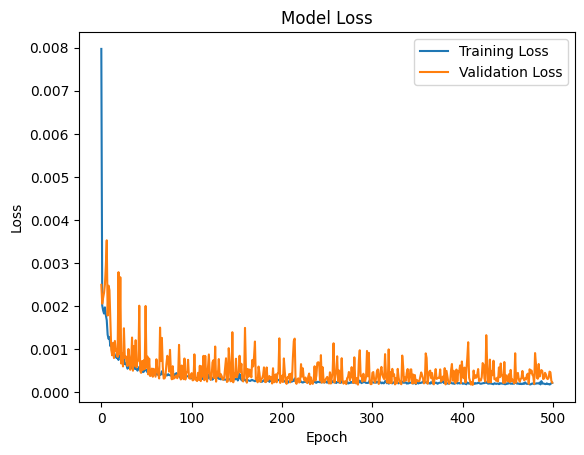

In [ ]:
# Plot training & validation loss values with moving average
plt.plot(history10.history['loss'], label='Training Loss')
plt.plot(history10.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# 4. Interpretasi

In [ ]:
import numpy as np
def mape(y_actual,y_predicted):
  y_actual = np.array(y_actual)
  y_predicted = np.array(y_predicted)
  mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100
  return mape

In [ ]:
pred_lstm1 = model1.predict(X_test)
pred_lstm_att1 = model6.predict(X_test)
nilai_mape_lstm1 = mape(y_test, pred_lstm1)
nilai_mape_lstm_att1 = mape(y_test, pred_lstm_att1)
print("Nilai MAPE Model 100 Epochs")
print(f"Nilai MAPE LSTM: {nilai_mape_lstm1}")
print(f"Nilai MAPE LSTM + ATTENTION: {nilai_mape_lstm_att1}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Nilai MAPE Model 100 Epochs
Nilai MAPE LSTM: 33.244144638770265
Nilai MAPE LSTM + ATTENTION: 31.99937498975176


In [ ]:
pred_lstm2 = model2.predict(X_test)
pred_lstm_att2 = model7.predict(X_test)
nilai_mape_lstm2 = mape(y_test, pred_lstm2)
nilai_mape_lstm_att2 = mape(y_test, pred_lstm_att2)
print("Nilai MAPE Model 200 Epochs")
print(f"Nilai MAPE LSTM: {nilai_mape_lstm2}")
print(f"Nilai MAPE LSTM + ATTENTION: {nilai_mape_lstm_att2}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Nilai MAPE Model 200 Epochs
Nilai MAPE LSTM: 31.270503325334996
Nilai MAPE LSTM + ATTENTION: 31.701468095754425


In [ ]:
pred_lstm3 = model3.predict(X_test)
pred_lstm_att3 = model8.predict(X_test)
nilai_mape_lstm3 = mape(y_test, pred_lstm3)
nilai_mape_lstm_att3 = mape(y_test, pred_lstm_att3)
print("Nilai MAPE Model 300 Epochs")
print(f"Nilai MAPE LSTM: {nilai_mape_lstm3}")
print(f"Nilai MAPE LSTM + ATTENTION: {nilai_mape_lstm_att3}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Nilai MAPE Model 300 Epochs
Nilai MAPE LSTM: 31.478360149385466
Nilai MAPE LSTM + ATTENTION: 31.39071492907807


In [ ]:
pred_lstm4 = model4.predict(X_test)
pred_lstm_att4 = model9.predict(X_test)
nilai_mape_lstm4 = mape(y_test, pred_lstm4)
nilai_mape_lstm_att4 = mape(y_test, pred_lstm_att4)
print("Nilai MAPE Model 400 Epochs")
print(f"Nilai MAPE LSTM: {nilai_mape_lstm4}")
print(f"Nilai MAPE LSTM + ATTENTION: {nilai_mape_lstm_att4}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Nilai MAPE Model 400 Epochs
Nilai MAPE LSTM: 31.12904983638031
Nilai MAPE LSTM + ATTENTION: 32.93172717000565


In [ ]:
pred_lstm5 = model5.predict(X_test)
pred_lstm_att5 = model10.predict(X_test)
nilai_mape_lstm5 = mape(y_test, pred_lstm5)
nilai_mape_lstm_att5 = mape(y_test, pred_lstm_att5)
print("Nilai MAPE Model 500 Epochs")
print(f"Nilai MAPE LSTM: {nilai_mape_lstm5}")
print(f"Nilai MAPE LSTM + ATTENTION: {nilai_mape_lstm_att5}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Nilai MAPE Model 500 Epochs
Nilai MAPE LSTM: 32.39915271310062
Nilai MAPE LSTM + ATTENTION: 31.94626259390438


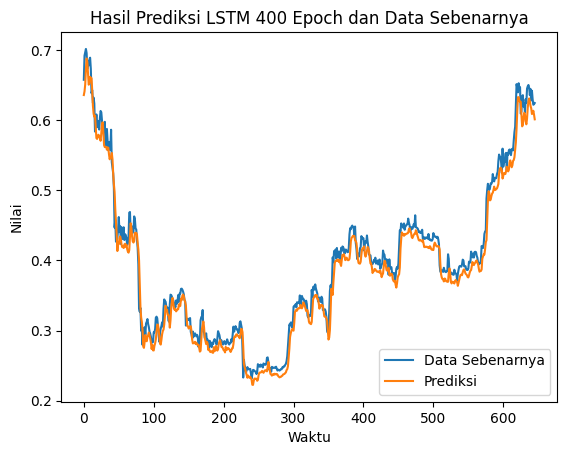

In [ ]:
import matplotlib.pyplot as plt

# Buat plot
plt.plot(y_test, label='Data Sebenarnya')
plt.plot(pred_lstm4, label='Prediksi')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.title('Hasil Prediksi LSTM 400 Epoch dan Data Sebenarnya')
plt.legend()
plt.show()

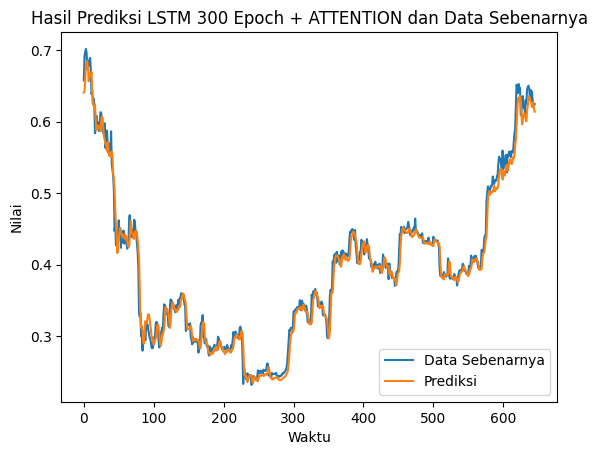

In [ ]:
import matplotlib.pyplot as plt

# Buat plot
plt.plot(y_test, label='Data Sebenarnya')
plt.plot(pred_lstm_att3, label='Prediksi')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.title('Hasil Prediksi LSTM 300 Epoch + ATTENTION dan Data Sebenarnya')
plt.legend()
plt.show()

In [ ]:
min_value = scaler.data_min_[3]
max_value = scaler.data_max_[3]

In [ ]:
asli_pred_lstm = pred_lstm4 * (max_value - min_value) + min_value
asli_pred_lstm[0]

array([43032.875], dtype=float32)

In [ ]:
asli_pred_lstm_att = pred_lstm_att3 * (max_value - min_value) + min_value
asli_pred_lstm_att[0]

array([43349.543], dtype=float32)

In [ ]:
y_asli = y_test * (max_value - min_value) + min_value
y_asli[0]

44500.828125

In [ ]:
df5_lstm = pd.DataFrame()
df5_lstm['Date'] = df4.iloc[2703:2712]['Date']
df5_lstm['Prediksi'] = asli_pred_lstm[:9]
df5_lstm['Actual'] = y_asli[:9]
df5_lstm.head()

,Date,Prediksi,Actual
2703,2022-02-24,43032.875000,44500.828125
2704,2022-02-25,43386.464844,46820.492188
2705,2022-02-26,44062.527344,47128.003906
2706,2022-02-27,45541.203125,47465.730469
2707,2022-02-28,46545.031250,47062.664063


In [ ]:
df6_lstm_att = pd.DataFrame()
df6_lstm_att['Date'] = df4.iloc[2703:2712]['Date']
df6_lstm_att['Prediksi'] = asli_pred_lstm_att[:9]
df6_lstm_att['Actual'] = y_asli[:9]
df6_lstm_att.head()

,Date,Prediksi,Actual
2703,2022-02-24,43349.542969,44500.828125
2704,2022-02-25,43469.597656,46820.492188
2705,2022-02-26,44478.796875,47128.003906
2706,2022-02-27,46076.464844,47465.730469
2707,2022-02-28,46228.320312,47062.664063
